## [Ad A/B Testing - Kaggle](https://www.kaggle.com/osuolaleemmanuel/ad-ab-testing)

| VariableName | Description |
|:--|:--|
| auction_id |the unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero. |
| experiment |which group the user belongs to - control or exposed. Control: users who have been shown a dummy ad. Exposed: users who have been shown a creative, an online interactive ad, with the SmartAd brand. |
| date |the date in YYYY-MM-DD format |
| hour |the hour of the day in HH format |
| device_make |the name of the type of device the user has e.g. Samsung |
| platform_os |the id of the OS the user has. |
| browser |the name of the browser the user uses to see the BIO questionnaire. |
| yes |1 if the user chooses the “Yes” radio button for the BIO questionnaire. |
| no |1 if the user chooses the “No” radio button for the BIO questionnaire. |





* auction_id: BIO를 제공받은 온라인 사용자의 고유 ID입니다. 표준 용어로 이를 노출 ID라고 합니다. 사용자는 BIO 설문지를 볼 수 있지만 응답하지 않을 수 있습니다. 이 경우 yes 및 no 열은 모두 0입니다.

* experiment: 사용자가 속한 그룹 - 통제 또는 노출.
    * control: 더미 광고가 표시된 사용자
    * Exposed: SmartAd 브랜드의 온라인 양방향 광고 크리에이티브를 본 사용자입니다.
* date: YYYY-MM-DD 형식의 날짜
* hour: HH 형식의 시간입니다.
* device_make: 사용자가 가지고 있는 장치 유형의 이름입니다. 예)삼성
* platform_os: 사용자가 가지고 있는 OS의 ID입니다.
* browser: 사용자가 BIO 설문지를 보기 위해 사용하는 브라우저의 이름입니다.
* yes: 사용자가 BIO 질문에 대해 "예" 라디오 버튼을 선택한 경우 1입니다.
* no: 사용자가 BIO 질문에 대해 "아니오" 라디오 버튼을 선택한 경우 1입니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("data/ad-ab-data.csv")
df.shape

(8077, 9)

In [3]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
df.tail()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0
8076,fffbb9ff-568a-41a5-a0c3-6866592f80d8,control,2020-07-10,14,Samsung SM-G960F,6,Facebook,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [6]:
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [7]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [8]:
df.describe(include="object")

,auction_id,experiment,date,device_make,browser
count,8077,8077,8077,8077,8077
unique,8077,2,8,269,15
top,0008ef63-77a7-448b-bd1e-075f42c55e39,control,2020-07-03,Generic Smartphone,Chrome Mobile
freq,1,4071,2015,4743,4554


In [9]:
df.nunique()

auction_id     8077
experiment        2
date              8
hour             24
device_make     269
platform_os       3
browser          15
yes               2
no                2
dtype: int64

In [10]:
df["chooses"] = "nan"
df.loc[df["yes"] == 1, "chooses"] = "yes"
df.loc[df["no"] == 1, "chooses"] = "no"

<AxesSubplot:>

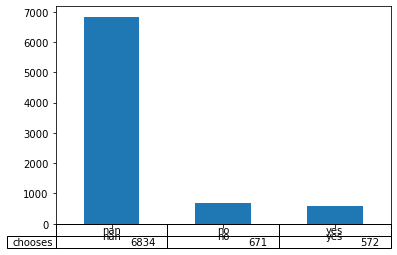

In [11]:
df["chooses"].value_counts().plot.bar(table=True, rot=0)

In [12]:
corr = df.corr()
corr

,hour,platform_os,yes,no
hour,1.000000,0.000062,0.013481,-0.021725
platform_os,0.000062,1.000000,0.054305,0.046941
yes,0.013481,0.054305,1.000000,-0.083098
no,-0.021725,0.046941,-0.083098,1.000000


In [13]:
mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

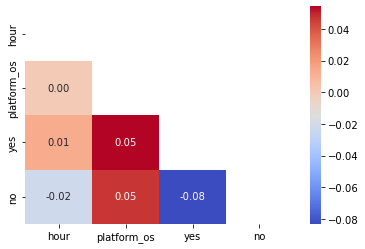

In [14]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

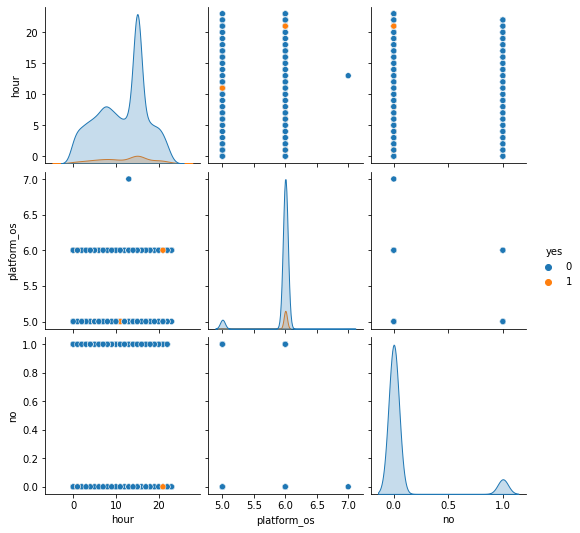

In [16]:
sns.pairplot(df, hue="yes")